In [1]:
portfolio = [
    {
        'symbol_name': 'NVDA',
        'exchange_id': 'US',
        'initial_holding': 3000,
    },
    {
        'symbol_name': 'TSLA',
        'exchange_id': 'US',
        'initial_holding': 2500,
    },
    {
        'symbol_name': 'MSFT',
        'exchange_id': 'US',
        'initial_holding': 2500,
    },
    {
        'symbol_name': 'AMZN',
        'exchange_id': 'US',
        'initial_holding': 1000,
    },
    {
        'symbol_name': 'GOOGL',
        'exchange_id': 'US',
        'initial_holding': 1000,
    },
]
s = ["NVDA", "TSLA", "MSFT", "AMZN", "GOOGL"]

In [2]:
import time
from datetime import datetime

DAY_IN_SEC:int = 86400
def url_constructor(api_token:str, symbol_name:str, exchange_id:str, **kwargs) -> str:
    interval:str = kwargs.get('interval', 'day')
    fmt:str = kwargs.get('format', 'json')
    base_url:str = "https://eodhd.com/api"
    if interval == 'day':
        today : datetime = datetime.today()
        to_date : str = kwargs.get('to_date', today.strftime('%Y-%m-%d'))
        years_advanced : int = kwargs.get('years_advanced', 1)
        from_date : str = kwargs.get('from_date', today.replace(year = today.year - years_advanced).strftime('%Y-%m-%d')) # By default get 1 year of data
        url : str = f"{base_url}/eod/{symbol_name}.{exchange_id}?api_token={api_token}&from={from_date}&to={to_date}&fmt={fmt}"
        print(url)
    else :
        time_now : int = int(time.time())
        to_date : str = kwargs.get('to_date', time_now) # By default goes back 3 months in time
        days_advanced : int = kwargs.get('days_advanced', 120)
        from_date  : str= kwargs.get('from_date', time_now - days_advanced * DAY_IN_SEC)
        url : str = f"{base_url}/intraday/{symbol_name}.{exchange_id}?api_token={api_token}&from={from_date}&to={to_date}&fmt={fmt}"
    return url

def split_url_constructor(api_token:str, symbol_name:str, exchange_id:str, **kwargs) -> str:
    today = datetime.today()
    years_advanced = kwargs.get('years_advanced', 10)
    from_date = kwargs.get('from_date',  today.replace(year = today.year - years_advanced).strftime('%Y-%m-%d'))
    to_date = kwargs.get('to_date', None)
    format = kwargs.get('format', 'json')
    if to_date:
        return f"https://eodhd.com/api/splits/{symbol_name}.{exchange_id}?from={from_date}&to={to_date}&api_token={api_token}&fmt={format}"
    return f"https://eodhd.com/api/splits/{symbol_name}.{exchange_id}?from={from_date}&api_token={api_token}&fmt={format}"




In [3]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
today = datetime.today()

api_key = "667822cc36e777.79338265"
data = {}
for symbol in portfolio:
    print(symbol['symbol_name'])
    url_price = url_constructor(api_key, symbol['symbol_name'], symbol['exchange_id'], interval = 'day', years_advanced=10)
    url_split = split_url_constructor(api_key, symbol['symbol_name'], symbol['exchange_id'])
    print(url_split)

    response_price = pd.DataFrame(requests.get(url_price).json())
    response_split = pd.DataFrame(requests.get(url_split).json())
    
    if len(response_split)==0:
        data[f'{symbol["symbol_name"]}'] = response_price
        continue

    response_split['split'] = response_split['split'].str.split("/").str[0].astype(float)
    _=['open', 'high', 'low', 'close', 'adjusted_close']
    
    for date in response_split['date']:
        split_multiplier = response_split.loc[response_split['date'] == date, 'split'].values[0]
        response_price.loc[response_price['date'] < date,_] = response_price.loc[response_price['date'] < date,_] / split_multiplier
    
    data[f'{symbol["symbol_name"]}'] = response_price

NVDA
https://eodhd.com/api/eod/NVDA.US?api_token=667822cc36e777.79338265&from=2014-07-15&to=2024-07-15&fmt=json
https://eodhd.com/api/splits/NVDA.US?from=2014-07-15&api_token=667822cc36e777.79338265&fmt=json
TSLA
https://eodhd.com/api/eod/TSLA.US?api_token=667822cc36e777.79338265&from=2014-07-15&to=2024-07-15&fmt=json
https://eodhd.com/api/splits/TSLA.US?from=2014-07-15&api_token=667822cc36e777.79338265&fmt=json
MSFT
https://eodhd.com/api/eod/MSFT.US?api_token=667822cc36e777.79338265&from=2014-07-15&to=2024-07-15&fmt=json
https://eodhd.com/api/splits/MSFT.US?from=2014-07-15&api_token=667822cc36e777.79338265&fmt=json
AMZN
https://eodhd.com/api/eod/AMZN.US?api_token=667822cc36e777.79338265&from=2014-07-15&to=2024-07-15&fmt=json
https://eodhd.com/api/splits/AMZN.US?from=2014-07-15&api_token=667822cc36e777.79338265&fmt=json
GOOGL
https://eodhd.com/api/eod/GOOGL.US?api_token=667822cc36e777.79338265&from=2014-07-15&to=2024-07-15&fmt=json
https://eodhd.com/api/splits/GOOGL.US?from=2014-07-15&

In [204]:
data['NVDA']

,date,open,high,low,close,adjusted_close,volume
0,2014-07-14,0.47825,0.48350,0.47650,0.48225,0.011480,272634717
1,2014-07-15,0.48300,0.48550,0.47975,0.48425,0.011527,395439236
2,2014-07-16,0.48625,0.49000,0.48100,0.48375,0.011515,319728357
3,2014-07-17,0.47825,0.48750,0.47825,0.48250,0.011485,324916797
4,2014-07-18,0.47250,0.47625,0.46025,0.46100,0.010972,567856754
...,...,...,...,...,...,...,...
2512,2024-07-08,127.49000,130.77000,127.04000,128.20000,128.200000,237677297
2513,2024-07-09,130.35000,133.82000,128.65000,131.38000,131.380000,287020812
2514,2024-07-10,134.03000,135.10000,132.42000,134.91000,134.910000,248978594
2515,2024-07-11,135.75000,136.15000,127.05000,127.40000,127.400000,374782688


In [4]:
data_vertical_concat = pd.concat(list(data.values()), axis=0, keys=list(data.keys()))
data_horizontal_concat = pd.concat(list(data.values()), axis=1, keys=list(data.keys()))

In [5]:
data_1 = data_vertical_concat
data_2 = data_horizontal_concat

In [6]:
for symbol in s:
    initial_price = data_1.loc[symbol,'open'].iloc[0]
    print(initial_price)
    data_1.loc[symbol, 'cumulative return'] = (data_1.loc[symbol,'open'].values -initial_price)/initial_price * 100

0.483
15.115339999999998
42.33
17.686
29.7575


In [8]:
PortfolioData = pd.DataFrame({
    'date': data_1.loc['NVDA','date']
})
for symbol in s:
    PortfolioData[symbol] = portfolio[s.index(symbol)]['initial_holding'] * (data_1.loc[symbol,'cumulative return']/100 + 1)

PortfolioData['Portfolio Total'] = PortfolioData[s].sum(axis=1)
PortfolioData['Portfolio Percentage Return'] = PortfolioData['Portfolio Total'] / PortfolioData['Portfolio Total'].iloc[0] * 100 - 100
PortfolioData

,date,NVDA,TSLA,MSFT,AMZN,GOOGL,Portfolio Total,Portfolio Percentage Return
0,2014-07-15,3000.000000,2500.000000,2500.000000,1000.000000,1000.000000,10000.000000,0.000000
1,2014-07-16,3020.186335,2445.859637,2510.630758,1005.371480,1002.923633,9984.971843,-0.150282
2,2014-07-17,2970.496894,2383.449529,2684.266478,999.208413,989.616063,10027.037377,0.270374
3,2014-07-18,2934.782609,2381.134000,2637.018663,1001.922425,1013.206755,9968.064451,-0.319355
4,2014-07-21,2852.484472,2395.470429,2631.703284,1012.382676,1010.417542,9902.458403,-0.975416
...,...,...,...,...,...,...,...,...
2511,2024-07-08,791863.354037,40969.968257,27554.334987,11310.641185,6381.416450,878079.714916,8680.797149
2512,2024-07-09,809627.329193,41514.117446,27580.911883,11274.454371,6395.362514,896392.175406,8863.921754
2513,2024-07-10,832484.472050,43465.777151,27239.546421,11308.096800,6356.380744,920854.273166,9108.542732
2514,2024-07-11,843167.701863,43548.474596,27343.491614,11313.468280,6379.736201,931752.872554,9217.528726


In [9]:
SP_500 = pd.DataFrame(requests.get(url_constructor(api_key, 'SPY', 'US', interval = 'day', years_advanced=10)).json())
SP_500['cumulative return'] = (SP_500['open'] - SP_500['open'].iloc[0]) / SP_500['open'].iloc[0] * 100
QQQ = pd.DataFrame(requests.get(url_constructor(api_key, 'QQQ', 'US', interval = 'day', years_advanced=10)).json())
QQQ['cumulative return'] = (QQQ['open'] - QQQ['open'].iloc[0]) / QQQ['open'].iloc[0] * 100
BTC = pd.DataFrame(requests.get(url_constructor(api_key, 'BTC-USD', 'CC', interval = 'day', years_advanced=10)).json())
BTC['cumulative return'] = (BTC['open'] - BTC['open'].iloc[0]) / BTC['open'].iloc[0] * 100

https://eodhd.com/api/eod/SPY.US?api_token=667822cc36e777.79338265&from=2014-07-15&to=2024-07-15&fmt=json
https://eodhd.com/api/eod/QQQ.US?api_token=667822cc36e777.79338265&from=2014-07-15&to=2024-07-15&fmt=json
https://eodhd.com/api/eod/BTC-USD.CC?api_token=667822cc36e777.79338265&from=2014-07-15&to=2024-07-15&fmt=json


In [10]:
PortfolioData['S&P 500 return'] = SP_500['cumulative return']
PortfolioData['NASDAQ 100 return'] = QQQ['cumulative return']
PortfolioData['BTC return'] = BTC['cumulative return']

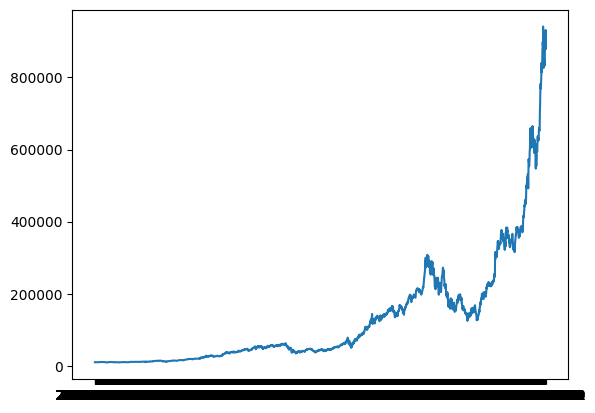

In [11]:
import matplotlib.pyplot as plt
plt.plot(PortfolioData['date'], PortfolioData['Portfolio Total'])
plt.show()

In [210]:
data_1.loc["NVDA"].iloc[2490:]

,date,open,high,low,close,adjusted_close,volume,cumulative return
2490,2024-06-04,115.716,116.6000,114.045,116.437,11.64274,403323976,24095.713539
2491,2024-06-05,118.371,122.4495,117.468,122.440,12.24299,528401795,24650.862520
2492,2024-06-06,124.048,125.5870,118.320,120.998,12.09881,664696163,25837.898589
2493,2024-06-07,119.770,121.6917,118.022,120.888,12.08781,412385776,24943.387350
2494,2024-06-10,120.370,123.1000,117.010,121.790,121.78000,314162688,25068.844746
2495,2024-06-11,121.770,122.8700,118.740,120.910,120.91000,222551203,25361.578672
2496,2024-06-12,123.060,126.8800,122.570,125.200,125.20000,299595000,25631.312075
2497,2024-06-13,129.390,129.8000,127.160,129.610,129.61000,260704500,26954.887611
2498,2024-06-14,129.960,132.8400,128.320,131.880,131.88000,309320375,27074.072138
2499,2024-06-17,132.990,133.7300,129.580,130.980,130.98000,288504375,27707.631992


In [12]:
DemoPortfolioData = PortfolioData.iloc[0::100]
DemoPortfolioData.drop(['NVDA','TSLA','MSFT','AMZN','GOOGL'], axis=1, inplace=True)

C:\Users\22110\AppData\Local\Temp\ipykernel_11456\2603592362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DemoPortfolioData.drop(['NVDA','TSLA','MSFT','AMZN','GOOGL'], axis=1, inplace=True)


In [34]:
DemoPortfolioData

,date,Portfolio Total,Portfolio Percentage Return,S&P 500 return,NASDAQ 100 return,BTC return
0,2014-07-15,10000.000000,0.000000,0.000000,0.000000,0.000000
100,2014-12-04,10451.872780,4.518728,4.966619,9.731194,-38.231537
200,2015-04-30,10983.374726,9.833747,6.150111,13.284018,-63.477022
300,2015-09-22,11623.219517,16.232195,-1.942140,8.418421,-61.241847
400,2016-02-16,11484.945144,14.849451,-4.526603,3.604918,-63.601217
500,2016-07-08,16415.419381,64.154194,6.741857,13.742446,-43.247860
600,2016-11-29,23830.441154,138.304412,11.531459,23.598666,-35.398777
700,2017-04-25,27530.612050,175.306121,20.326725,40.216712,13.630411
800,2017-09-15,39777.446304,297.774463,25.778879,51.656595,-3.664056
900,2018-02-08,51223.143138,412.231431,35.550273,67.420296,54.940838


In [18]:
def sharpe_ratio(return_series, **kwargs):
    N = kwargs.get('N', 255)
    rf = kwargs.get('rf', 0.02)
    mean = return_series.mean()*N - rf
    sigma = return_series.std()*np.sqrt(N)
    return mean/sigma
def max_drawdown(return_series):
    peak = comp_
    

In [36]:
DemoPortfolioData
DemoInfo = pd.DataFrame()
DemoInfo['sharpe_ratio'] = pd.Series(PortfolioData.drop(["date","Portfolio Total"],axis=1).apply(sharpe_ratio, axis=0))
DemoInfo

,sharpe_ratio
NVDA,10.820843
TSLA,15.147442
MSFT,23.714067
AMZN,28.050549
GOOGL,29.985015
Portfolio Percentage Return,11.948935
S&P 500 return,19.586534
NASDAQ 100 return,19.304726
BTC return,9.420587


In [14]:
DemoPortfolioData.to_json('DemoPortfolioReturn.json', index=False, orient='records')